In [1]:
# from google.colab import drive
# drive.mount("/content/drive")

# import os
# os.chdir('/content/drive/MyDrive/根據區域微氣候資料預測發電量競賽')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
# 讀取資料
df = pd.read_csv('L15_Train.csv')
df

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,15,2024-02-09 14:58:38.000,0.00,1021.06,18.49,65.32,7634.17,11.78
1,15,2024-02-09 14:59:38.000,1.13,1020.78,18.51,64.87,7090.83,10.32
2,15,2024-02-09 15:00:38.000,0.35,1021.06,18.48,65.49,7103.33,10.26
3,15,2024-02-09 15:01:38.000,0.17,1020.94,18.44,65.56,7509.17,11.49
4,15,2024-02-09 15:02:38.000,3.22,1021.04,18.47,65.29,7801.67,12.34
...,...,...,...,...,...,...,...,...
85235,15,2024-07-12 15:25:58.000,0.00,1004.10,37.28,100.00,11845.83,36.03
85236,15,2024-07-12 15:26:57.000,0.00,1004.14,37.37,100.00,11896.67,36.15
85237,15,2024-07-12 15:27:57.000,0.00,1004.11,37.25,100.00,11910.00,36.15
85238,15,2024-07-12 15:28:58.000,0.00,1004.13,37.20,100.00,11955.00,36.15


In [4]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,85240.0,85240.000000,85240.000000,85240.000000,85240.000000,85240.000000,85240.000000
mean,15.0,0.218284,1013.439426,29.653549,76.335830,21079.121413,265.046636
std,0.0,0.638305,6.026021,8.051354,23.156364,27283.366616,517.669967
min,15.0,0.000000,999.490000,9.900000,14.940000,20.000000,0.000000
25%,15.0,0.000000,1008.980000,23.940000,57.380000,3130.830000,2.680000
50%,15.0,0.000000,1012.400000,28.680000,80.760000,9826.670000,24.670000
75%,15.0,0.000000,1017.820000,34.490000,100.000000,24974.997500,164.260000
max,15.0,8.970000,1030.650000,56.480000,100.000000,117758.200000,2513.280000


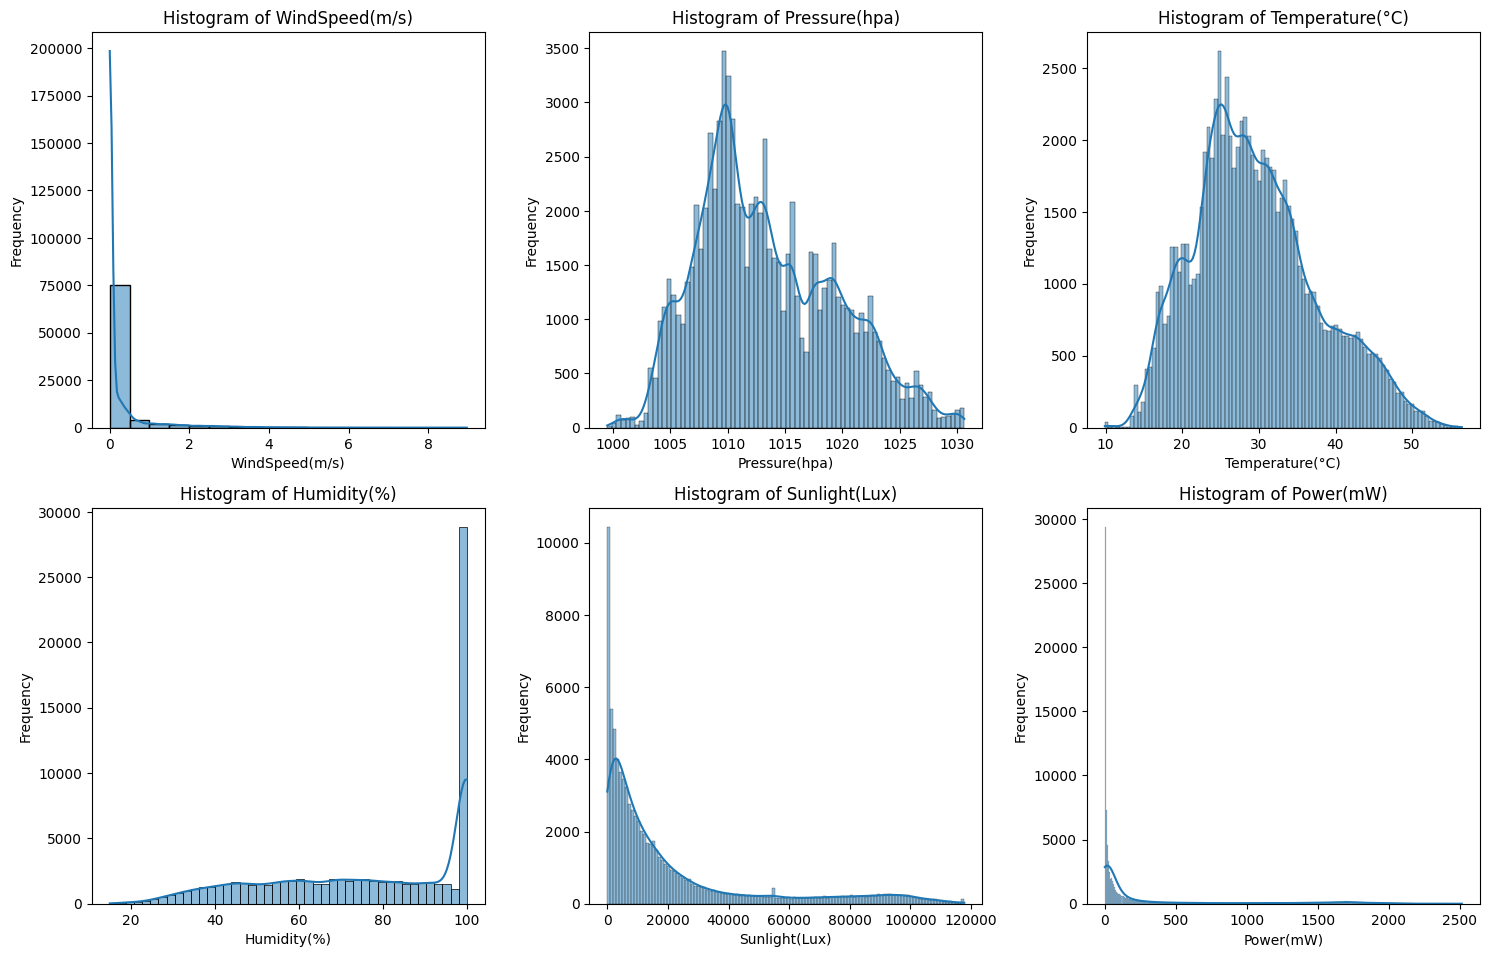

In [5]:
# 繪製直方圖
use_columns = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [6]:
# 篩選Sunlight(Lux)最大值
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] == max_sunlight]
df_filtered

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
4756,15,2024-02-17 10:04:22.000,0.0,1020.75,28.77,57.95,117758.2,2299.81
4806,15,2024-02-17 10:54:40.000,0.0,1020.37,28.68,57.79,117758.2,2513.28
4807,15,2024-02-17 10:55:40.000,0.0,1020.40,30.50,53.85,117758.2,2337.93
4810,15,2024-02-17 10:58:41.000,0.0,1020.29,31.56,47.46,117758.2,2428.54
4811,15,2024-02-17 10:59:42.000,0.0,1020.23,33.49,48.82,117758.2,2327.88
...,...,...,...,...,...,...,...,...
74004,15,2024-06-12 10:09:28.000,0.0,1006.27,46.62,67.72,117758.2,2040.87
74012,15,2024-06-12 10:17:28.000,0.0,1006.13,49.08,53.58,117758.2,2001.43
74013,15,2024-06-12 10:18:28.000,0.0,1006.16,49.56,54.15,117758.2,1939.56
74014,15,2024-06-12 10:19:28.000,0.0,1006.15,50.43,44.75,117758.2,1910.36


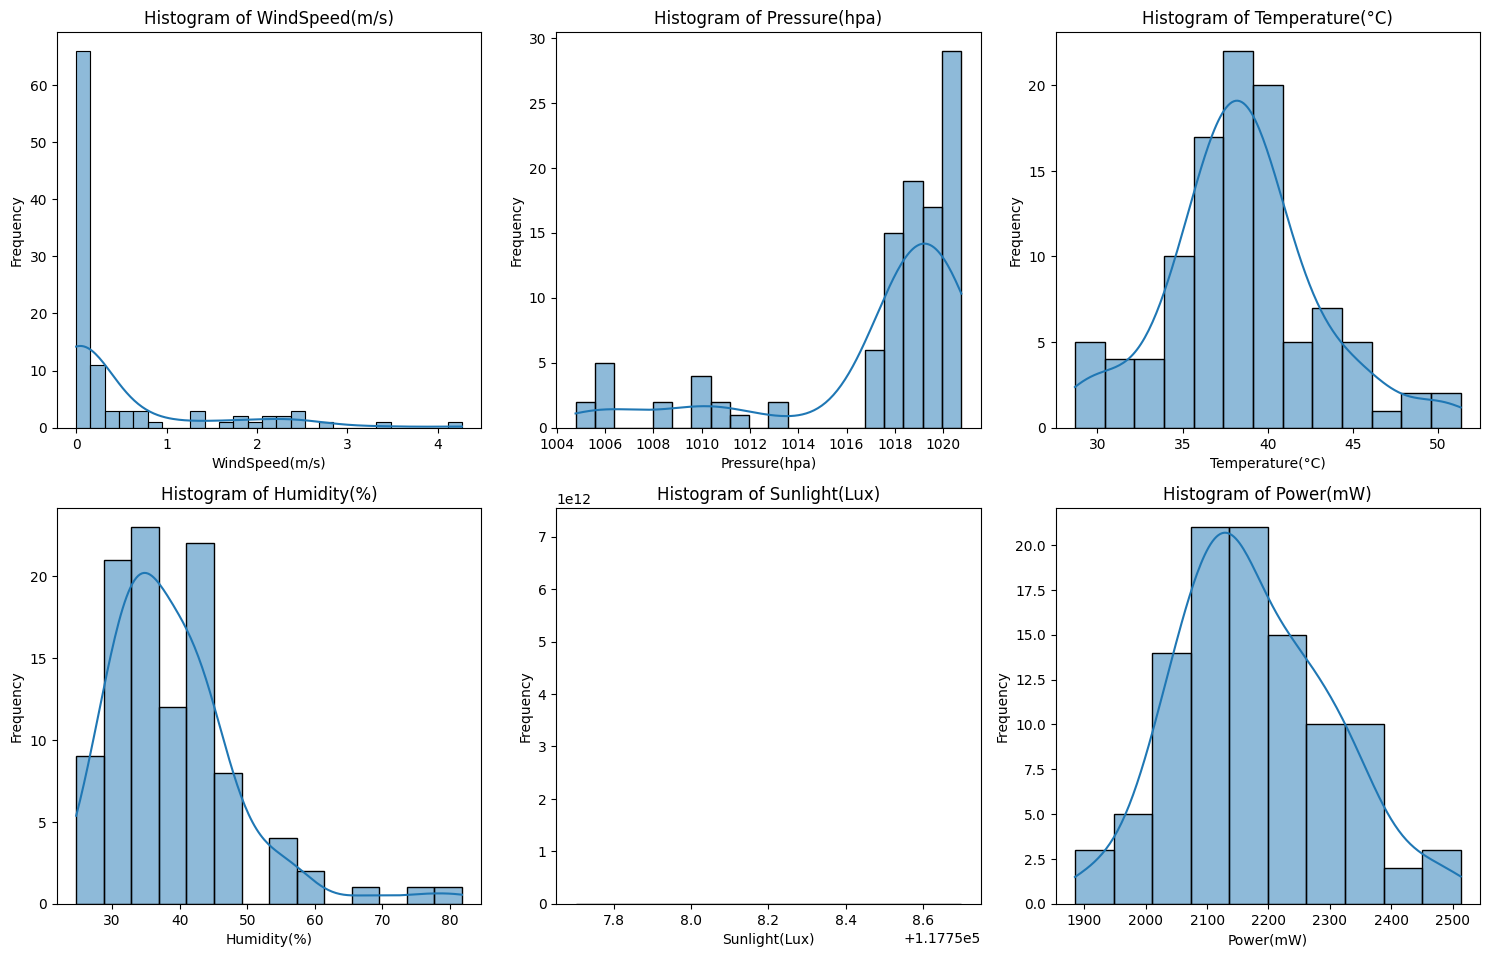

In [7]:
# 繪製直方圖
use_columns = df_filtered[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_filtered[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [8]:
# 利用迴歸分析先分析Sunlight(Lux)數值尚未達到最大值前的Sunlight(Lux)對Power(mW)的比率，回推Power(mW)所產生的Sunlight(Lux)
from sklearn.linear_model import LinearRegression

# 步驟 1：篩選資料（過濾 Sunlight(Lux) 未達到最大值的數據）
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] < max_sunlight]

# 步驟 2：設定自變數與因變數
X = df_filtered[['Sunlight(Lux)']]  # 自變數 (Sunlight)
y = df_filtered['Power(mW)']        # 因變數 (Power)

# 步驟 3：建立線性迴歸模型並進行訓練
model = LinearRegression()
model.fit(X, y)

# 顯示迴歸係數和截距
slope = model.coef_[0]
intercept = model.intercept_

print(f'回歸方程：Power(mW) = {slope:.4f} * Sunlight(Lux) + {intercept:.4f}')

回歸方程：Power(mW) = 0.0184 * Sunlight(Lux) + -123.6588


In [9]:
def calculate_sunlight(power):
    sunlight = (power - intercept) / slope
    return sunlight
slope = 0.0184
intercept = -123.6588

# 複製df_filtered
df_filtered = df[df['Sunlight(Lux)'] == df['Sunlight(Lux)'].max()].copy()

# 使用 .loc 指定修改列中的欄位，回推Sunlight(Lux)
df_filtered['Recalculated Sunlight(Lux)'] = df_filtered['Power(mW)'].apply(calculate_sunlight)

# 更新原始df中的Sunlight(Lux)欄位
df.loc[df_filtered.index, 'Sunlight(Lux)'] = df_filtered['Recalculated Sunlight(Lux)']
# df

In [10]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,85240.0,85240.000000,85240.000000,85240.000000,85240.000000,85240.000000,85240.000000
mean,15.0,0.218284,1013.439426,29.653549,76.335830,21087.969272,265.046636
std,0.0,0.638305,6.026021,8.051354,23.156364,27316.899871,517.669967
min,15.0,0.000000,999.490000,9.900000,14.940000,20.000000,0.000000
25%,15.0,0.000000,1008.980000,23.940000,57.380000,3130.830000,2.680000
50%,15.0,0.000000,1012.400000,28.680000,80.760000,9826.670000,24.670000
75%,15.0,0.000000,1017.820000,34.490000,100.000000,24974.997500,164.260000
max,15.0,8.970000,1030.650000,56.480000,100.000000,143311.891304,2513.280000


In [11]:
df['LocationCode'] = df['LocationCode'].apply(lambda x: f'{x:02d}')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')

# 提取日期時間的相關特徵
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second
df['Weekday'] = df['DateTime'].dt.weekday

df['DateTime'] = df['Year'].astype(str).str.zfill(4) + \
                    df['Month'].astype(str).str.zfill(2) + \
                    df['Day'].astype(str).str.zfill(2) + \
                    df['Hour'].astype(str).str.zfill(2) + \
                    df['Minute'].astype(str).str.zfill(2) + \
                    df['Second'].astype(str).str.zfill(2)
df = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second' ,'Weekday'], axis=1)
df['DateTime'] = df['DateTime'].astype('int64')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y%m%d%H%M%S')

# 每10筆資料合併成一筆並計算平均值
# 使用 `groupby` 和 `agg` 方法
df = df.groupby(df.index // 10).agg({
    'LocationCode': 'first',  # 取第一筆的 LocationCode
    'DateTime': 'first',  # 取第一筆的 DateTime
    'WindSpeed(m/s)': 'mean',
    'Pressure(hpa)': 'mean',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Sunlight(Lux)': 'mean',
    'Power(mW)': 'mean',
}).reset_index(drop=True)

df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']] = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']].round(2)

# 將 DateTime 列轉換回原格式
df['DateTime'] = df['DateTime'].dt.strftime('%Y%m%d%H%M%S')

In [12]:
# 將 LocationCode 轉換為字符串
df['LocationCode'] = df['LocationCode'].astype(str)

# 修改 DateTime 的最後兩位數為 LocationCode 的值
df['DateTime'] = df['DateTime'].str.slice(0, -2) + df['LocationCode']

df = df.rename(columns={'DateTime': 'Serial'}) #　序號
df['Serial'] = df['Serial'].astype('int64')
df = df.drop(['LocationCode'], axis=1)
df

,Serial,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,20240209145815,0.95,1020.96,18.41,65.73,7349.75,11.06
1,20240209150815,0.54,1021.00,18.18,66.61,6591.17,8.78
2,20240209151815,1.38,1021.04,17.96,67.35,5125.75,5.35
3,20240209152815,1.56,1021.15,17.66,67.72,4935.92,5.04
4,20240209153815,1.80,1021.21,17.61,68.01,4937.58,5.10
...,...,...,...,...,...,...,...
8519,20240712144015,0.00,1004.05,36.92,100.00,11110.58,33.40
8520,20240712145015,0.00,1004.08,37.58,100.00,10799.00,31.11
8521,20240712150015,0.00,1004.08,36.94,100.00,11127.83,32.62
8522,20240712151015,0.00,1004.09,36.88,100.00,11916.83,37.60


# HEATMAP

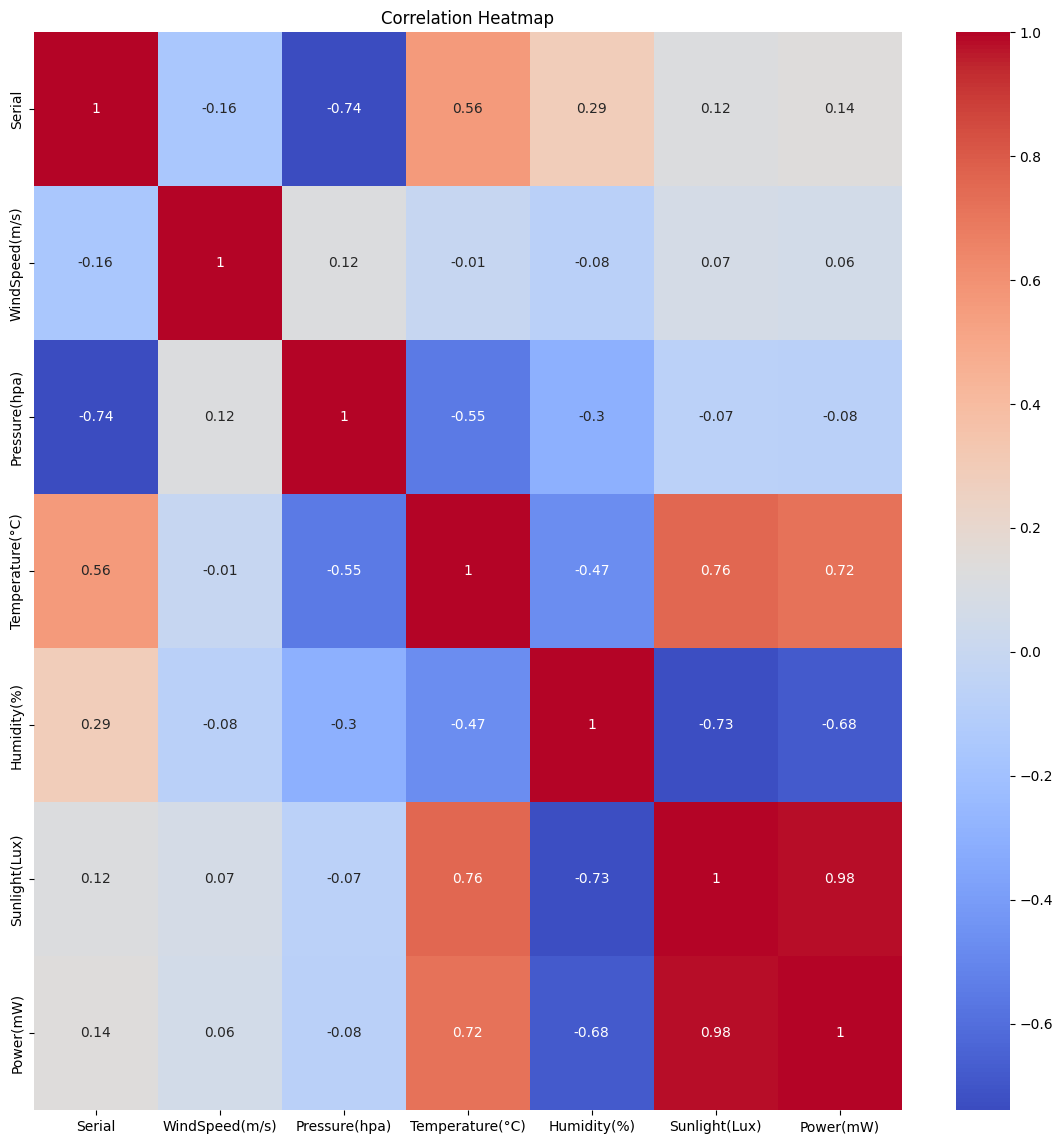

In [13]:
# 繪製熱力圖
plt.figure(figsize=(14, 14))

corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# 相關性絕對值
correlation = df.corr().abs()
top_10_features = correlation['Power(mW)'].sort_values(ascending=False).head(11)
top_10_features

Power(mW)          1.000000
Sunlight(Lux)      0.977190
Temperature(°C)    0.718592
Humidity(%)        0.677523
Serial             0.135091
Pressure(hpa)      0.083509
WindSpeed(m/s)     0.060476
Name: Power(mW), dtype: float64

In [15]:
df.to_csv('L15_Train_Revise.csv', index=False)